# Материалы

Презентация: *https://disk.yandex.ru/i/o17wBl80f-7Pyw*

Дашборд: *https://public.tableau.com/views/Mobilegame_16686277445190/Dashboard2?:language=en-US&:display_count=n&:origin=viz_share_link*



# Мобильная игра "Космические братья" 

Мобильная игра "Космические братья" уже пользуется большой популярностью — насталол время на ней зарабатывать.

#### Цель работы:
Определить основные факторы для монетизации мобильной игры.

#### Задачи работы:
Основной задачей является формирование модели монетизации игрового приложения. Также следует провести исследовательский анализ данных, проанализировать данные, проверить статистические гипотезы.


#### Описание данных:

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет *ad_costs.csv* содержит колонки:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение



####  Ход работы:

##### Шаг 1. Загрузка данных
- загрузить необходимые библиотеки;
- загрузить данные;
- посмотреть информацию о данных.

##### Шаг 2. Предобработка данных
- Проверить корректность наименований колонок;
- Переименовать колонки;
- Исследовать соответствие типов;
- Привести типы;
- Исследовать дубликаты;
- Удалить дубликаты;
- Заменить пропущенные значения;
- Соединить таблицы.
 
##### Шаг 3. Исследовательский анализ данных
Проанализировать рекламу
- Расчитать все необходимые метрики (LTV,CAC,ROI);
- Определить топ популярных источников, с которых приходят пользователи, установившие приложения;
- Определить соотношение вложенных в рекламу денег.

Проанализировать пользователей в процессе игры:
- Построить гистограмму по количеству пользоватей в день;
- Построить гистограмму по количеству событий в день;
- Построить круговую диаграмму по соотношению событий;
- Определить самый популярный тип здания;
- Оценить динамику пользователей, прошедших и не прошедших уровень;


##### Шаг 4. Проверка статистических данных
- Проверить гипотезу: время завершения уровня различается в зависимости от способа прохождения.

Сформулируем две гипотезы так:

Н0: Время завершения уровня через реализацию проекта и через победу над первым игроком равны.

Н1: Время завершения уровня через реализацию проекта и через победу над первым игроком не равны.

##### Шаг 5. Выводы и рекомендации
- Сделать общий вывод и дать рекомендации по монетизации.




## Загрузка данных

In [1]:
# импорт всех библиотек
import pandas as pd # импорт библиотеки pandas
from scipy import stats as st
import matplotlib.pyplot as plt 
import warnings
import numpy as np
import math
import plotly
import plotly.graph_objs as go
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)


from operator import is_not
from functools import partial
from datetime import datetime, timedelta
from scipy import stats as st
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from plotly.offline import init_notebook_mode, iplot
from itertools import combinations



In [2]:
# загрузка таблиц
try:
    game_actions = pd.read_csv('/datasets/game_actions.csv')
    ad_costs = pd.read_csv('/datasets/ad_costs.csv')
    user_source = pd.read_csv('/datasets/user_source.csv')
    print('Загрузка прошла успешно')
except FileNotFoundError:
    print('Проблема с загрузкой файла')

Загрузка прошла успешно


In [3]:
# выведем сами таблицы и изучим информацию о них
display(game_actions.head())
game_actions.info()


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [4]:
display(ad_costs.head())
print(ad_costs.info())
#посмотрим здесь на целочисленный столбец поподробне
ad_costs.describe().T

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
None


,count,mean,std,min,25%,50%,75%,max
cost,28.0,271.556321,286.86765,23.314669,66.747365,160.056443,349.034473,969.139394


In [5]:
display(user_source.head())
user_source.info()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


### Вывод

В данном пункте импортированы все необходимые библиотеки, загружены данные. 

В таблице `game_actions` имеются пропуски в столбцах `building_type`, `project_type`, а также столбец `event_datetime` не приведен к нужному типу данных. В таблице `ad_costs` нет пропусков, но столбец `day` не приведен к нужному типу данных. В таблице `user_source` на первый взгляд все в порядке. Все названия колонок приведены к нижнему регистру.


## Предобработка данных

### Обработка таблицы `game_actions`

В таблице `game_actions` столбец `event_datetime`  приведем к нужному типу данных.

In [6]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format='%Y.%m.%d %H:%M:%S')

In [7]:
print('Первый день исследования:',game_actions['event_datetime'].min())
print('Последний день исследования:',game_actions['event_datetime'].max())

Первый день исследования: 2020-05-04 00:00:01
Последний день исследования: 2020-06-05 12:32:49


In [8]:
# проверим полные дубликаты 
print('Количество дубликатов:',game_actions.duplicated().sum())

Количество дубликатов: 1


Удалим полученный дубликат.

In [9]:
game_actions = game_actions.drop_duplicates().reset_index(drop=True)

Рассмотрим неявные дубликаты в отдельных столбцах.

In [10]:
game_actions['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [11]:
game_actions['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14137
Name: building_type, dtype: int64

In [12]:
game_actions['project_type'].value_counts()

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

Значения в столбцах уникальны.

Рассмотрим пропуски в столбцах `building_type`, `project_type`. 

In [13]:
print('Пропущенные значения в столбце building_type:', game_actions['building_type'].isna().sum())
print('Процент пропущенных значений в столбце building_type: {:.2%}'.format(
    game_actions[game_actions['building_type'].isna()].count()[0]/game_actions.shape[0]))
print('Пропущенные значения в столбце project_type:', game_actions['project_type'].isna().sum())
print('Процент пропущенных значений в столбце project_type: {:.2%}'.format(
    game_actions[game_actions['project_type'].isna()].count()[0]/game_actions.shape[0]))

Пропущенные значения в столбце building_type: 7683
Процент пропущенных значений в столбце building_type: 5.66%
Пропущенные значения в столбце project_type: 133773
Процент пропущенных значений в столбце project_type: 98.62%


В столбце `building_type` указывается тип здания, который выбрал игрок, а в столбце `project_type` есть одно событие - разработка орбитальной сборки спутников, когда игрок завершил первый уровень. 

Данные пропуски имееют место быть, потому что событие в столбце `project_type` исключает события в столбце `building_type`, тогда пропуски в них мы заменим на заглушку 'unknown'.

In [14]:
game_actions['building_type'] = game_actions['building_type'].fillna('unknown')
game_actions['project_type'] = game_actions['project_type'] .fillna('unknown')

Также есть смысл добавить столбец с днем и неделей в данную таблицу и проверить информацию о ней.

In [15]:
game_actions['date'] = game_actions['event_datetime'].dt.strftime('%Y-%m-%d')
game_actions['date'] = pd.to_datetime(game_actions['date'])
game_actions['week'] =game_actions['event_datetime'].dt.isocalendar().week

Необходимо добавить столбец, в котором укажем статус игрока: прошел ли он первый уровень через разработку проекта или через победу над врагом, или он находится в процессе прохождения первого уровня.

In [16]:
event_user = game_actions.groupby('user_id')['event'].unique()

#создадим фукцию, которая будет определять статус пользователя
def status(row):
    if row['event'] == 'project': 
        return 'project' #победа через  проект 
    if row['event'] == 'finished_stage_1':
        if 'project' not in event_user[row['user_id']]:
            return 'fight' #победа над врагом
    else:
        return 'not_win' #не прошел уровень
        
game_actions['status'] = game_actions.apply(status, axis=1)
game_actions['status'].value_counts()

not_win    127956
fight        3951
project      1866
Name: status, dtype: int64

In [17]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   135639 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    135639 non-null  object        
 5   date            135639 non-null  datetime64[ns]
 6   week            135639 non-null  UInt32        
 7   status          133773 non-null  object        
dtypes: UInt32(1), datetime64[ns](2), object(5)
memory usage: 7.9+ MB


### Обработка таблицы `ad_costs`

Столбец `day` приведем к нужному типу данных.

In [18]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])
ad_costs['day'].value_counts()

2020-05-05    4
2020-05-09    4
2020-05-06    4
2020-05-03    4
2020-05-07    4
2020-05-04    4
2020-05-08    4
Name: day, dtype: int64

In [19]:
# проверим полные дубликаты 
print('Количество дубликатов:',ad_costs.duplicated().sum())

Количество дубликатов: 0


In [20]:
# неполные дубликаты
ad_costs['source'].value_counts()

facebook_ads               7
yandex_direct              7
instagram_new_adverts      7
youtube_channel_reklama    7
Name: source, dtype: int64

In [21]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


Пропусков в таблице нет.

### Обработка таблицы `user_source`

In [22]:
# проверим полные дубликаты 
print('Количество дубликатов:',user_source.duplicated().sum())

Количество дубликатов: 0


In [23]:
# неполные дубликаты
user_source['source'].value_counts()

yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64

Проверим уникальность пользователей из двух разных таблиц.

In [24]:
user_source['user_id'].nunique() == game_actions['user_id'].nunique()

True

Все таблицы предобработаны. Соединим их.

In [25]:
game_actions = game_actions.merge(user_source, how='inner')

In [26]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135638
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   135639 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    135639 non-null  object        
 5   date            135639 non-null  datetime64[ns]
 6   week            135639 non-null  UInt32        
 7   status          133773 non-null  object        
 8   source          135639 non-null  object        
dtypes: UInt32(1), datetime64[ns](2), object(6)
memory usage: 10.0+ MB


### Вывод

В данном пункте была проведена предобработка данных: были удалены полные дубликаты и проверены неявные, заменены пропуски и даты приведены к нужному типу данных. Также были соединены таблицы `game_actions` и `user_source`.

## Исследовательский анализ данных

### Анализ рекламы

#### Расчитаем DAU, WAU, Sticky Factor

Расчитаем DAU, WAU, Sticky Factor, которые помогут понять насколько вовлечен пользователь в нашу игру.

In [27]:
dau = game_actions.groupby('date').agg({'user_id': 'nunique'}).mean()

dau

user_id    2884.878788
dtype: float64

In [28]:
wau = (
    game_actions.groupby(['week'])
    .agg({'user_id': 'nunique'})
    .mean()
)
wau

user_id    6120.0
dtype: float64

In [29]:
print('Sticky factor равен: ', "{:.2%}".format(float(dau / wau))) 

Sticky factor равен:  47.14%


По дням в игру в среднем заходят 2885 пользовтаелей, в неделю - 6120

Sticky Factor, рекламная метрика, применяемая в интернет-маркетинге, которая показывает степень лояльности и вовлеченности аудитории, равен 47.14%, что достаточно высоко.

#### Стоимость привлечения - САС

In [30]:
# функция для создания пользовательских профилей

def get_profiles(game_action, ad_costs):

    # сортируем сессии по ID игроков и дате посещения, группируем по ID и находим первые значения `session_start` и `source`
    # столбец с временем первого посещения назовём `start_data`
    profiles = (
        game_action.sort_values(by=['user_id', 'event_datetime'])
        .groupby('user_id')
        .agg({'event_datetime': [min, max], 'source': 'first'})
        .reset_index()  # возвращаем user_id из индекса
    )
    
    # объеденим разные уровни в названии столбцов
    profiles.columns = list(map("_".join, profiles.columns))
    
    # переименуем столбцы
    profiles = profiles.rename(columns={'user_id_': 'user_id',
                                        'source_first': 'source',
                                        'event_datetime_min': 'start',
                                        'event_datetime_max': 'finish'})
    
    
    
    # определяем дату первого посещения
    profiles['dt'] = profiles['start'].dt.date
    profiles['day'] = pd.to_datetime(profiles['dt'])

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['day', 'source'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём `unique_users`
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем `day` и `source` из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей по дате и каналу привлечения
    adv_costs = ad_costs.merge(new_users, on=['day', 'source'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей результаты сохраним в столбец `acquisition_cost` (CAC)
    adv_costs['acquisition_cost'] = adv_costs['cost'] / adv_costs['unique_users']
    
    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        adv_costs[['day', 'source', 'acquisition_cost']],
        on=['day', 'source'],
        how='left',
    )
    
    # отбираем данные только по тем пользователям кто построил здание
    game_action = game_action.query('event == "building"')

    # считаем количество зданий построенных каждым пользователем
    building = (
        game_action.groupby(['user_id'])
        .agg({'event': 'count'})
         # столбец с количеством зданий назовём `building_count`
        .rename(columns={'event': 'building_count'})
        .reset_index()  # возвращаем `user_id` из индексов
    )

    # объединяем профили пользователей с количеством зданий построенных каждым пользователем
    profiles = profiles.merge(building, on=['user_id'], how='left')
    
    return profiles

In [31]:
profiles = get_profiles(game_actions, ad_costs)
profiles

,user_id,start,finish,source,dt,day,acquisition_cost,building_count
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,facebook_ads,2020-05-06,2020-05-06,0.515890,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,yandex_direct,2020-05-06,2020-05-06,0.272466,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,youtube_channel_reklama,2020-05-05,2020-05-05,0.221782,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,instagram_new_adverts,2020-05-05,2020-05-05,0.394436,8
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,facebook_ads,2020-05-05,2020-05-05,0.374907,12
...,...,...,...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,instagram_new_adverts,2020-05-04,2020-05-04,0.346367,9
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,2020-05-14 10:11:36,facebook_ads,2020-05-04,2020-05-04,0.463137,16
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,2020-05-12 13:01:52,yandex_direct,2020-05-04,2020-05-04,0.266916,9
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,2020-05-11 22:04:30,instagram_new_adverts,2020-05-04,2020-05-04,0.346367,7


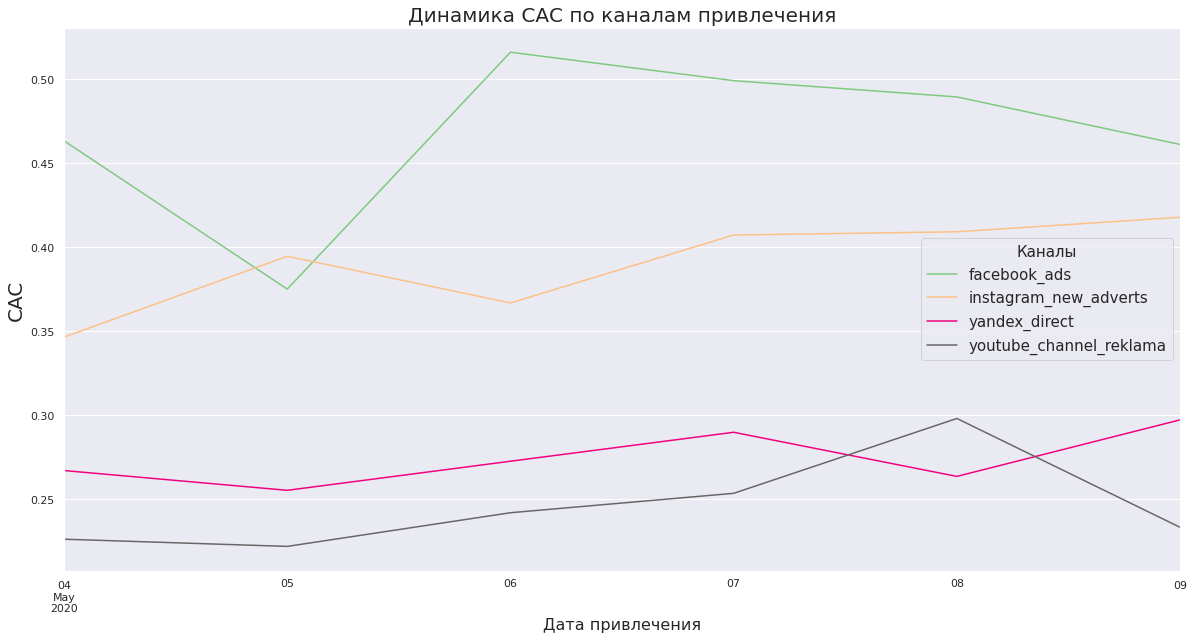

In [32]:
profiles.pivot_table(
    index='day',
    columns='source',
    values='acquisition_cost',
    aggfunc='mean'
).plot(figsize=(20, 10), cmap = 'Accent')
plt.ylabel('CAC', fontsize=20)
plt.xlabel('Дата привлечения', fontsize=16)
plt.title('Динамика САС по каналам привлечения', fontsize=20)
plt.legend(title="Каналы", fontsize=15, title_fontsize=15)
plt.show()

Посмотрим на графике с каких каналов к нам пришли игроки.

In [33]:
#группируем данные для соединения
costs = ad_costs.groupby(['source']).agg({'cost':'sum'}).reset_index()
user = user_source.groupby(['source']).agg({'user_id':'count'}).reset_index()
costs = costs.merge(user,  how='inner')
costs

,source,cost,user_id
0,facebook_ads,2140.904643,2726
1,instagram_new_adverts,2161.441691,3347
2,yandex_direct,2233.111449,4817
3,youtube_channel_reklama,1068.119204,2686


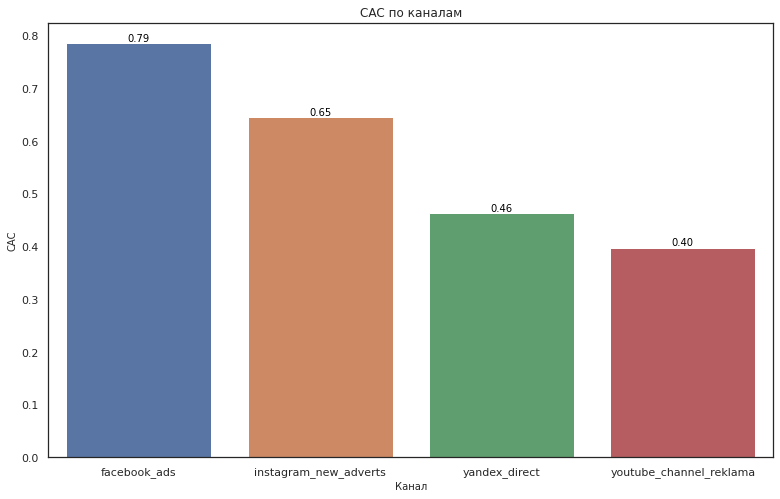

In [34]:
costs['cac']=costs['cost']/costs['user_id']
costs=costs.sort_values(by='cac',ascending=False)

sns.set_style('white')

p=sns.barplot(x = 'source', y = "cac", data = costs)
p.set_title("CAC по каналам")
p.set_xlabel("Канал", fontsize = 10)
p.set_ylabel("CAC", fontsize = 10)
plt.gcf().set_size_inches(13, 8)
for i in p.patches:
             p.annotate("%.2f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

In [35]:
print('Средняя CAC:',costs['cac'].mean() )

Средняя CAC: 0.5731002471448883


Все каналы стабильны. Однако у facebook 10.05.2020 стоимость привлечения упала.
Cамый дорогой канал facebook_ads, самый дешевый youtube_channel_reklama.
Cредняя стоимость CAC для всех 4 каналов - 0.57.
Больше всего пользователй пришло с yandex_direct, туда же вкладывают чуть больше денег, чем во все остальные, хотя затраты примерно одинаковые. Меньше всего вкладывают в youtube_channel_reklama.


####  Пожизненная ценность клиента LTV и рентабельность инвестиций в маркетинг ROI

In [36]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'date', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['date'] - result_raw['start']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
                # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    return ( result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        roi_grouped  # таблица ROI
        
    )


In [37]:
# функция добавляет столбец с revenue

def revenue(data):
    if data == 'building':
        return .07 # так как 7 центов приносит 1 клик по рекламе по ТЗ
    else:
        return 0

In [38]:
# добавляем столбец с revenue

game_actions['revenue'] = game_actions['event'].apply(revenue)

In [39]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, roi, horizon):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 1, 1)
    ltv.T.plot(grid=True, ax=ax1, cmap = 'Accent')
    plt.legend()
    plt.xlabel('Лайфтайм', size=16)
    plt.title('LTV', size=20)

    # второй график — кривые roi
    ax2 = plt.subplot(2, 1, 2)
    roi.T.plot(grid=True, ax=ax2, cmap = 'Accent')
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм', size=16)
    plt.title('ROI', size=20)

    plt.tight_layout()
    plt.show()

In [40]:
# для горизонта анализа найдем медианное количество дней прохождения игры

hor=game_actions.pivot_table(index = 'user_id', # создадим сводную таблицу по пользователям и временем прохождения игры
    columns='project_type', 
    aggfunc={'date':'count'}).reset_index()
hor.columns = ['user_id','win','not_win']
hor = hor.dropna(subset = ['win'])# оставим тех, кто дошел до конца
hor['not_win']=hor['not_win']+1 # прибавляем день, когда дошли до конца
hor['not_win'].median() #медианное количество дней прохождения игры

14.0

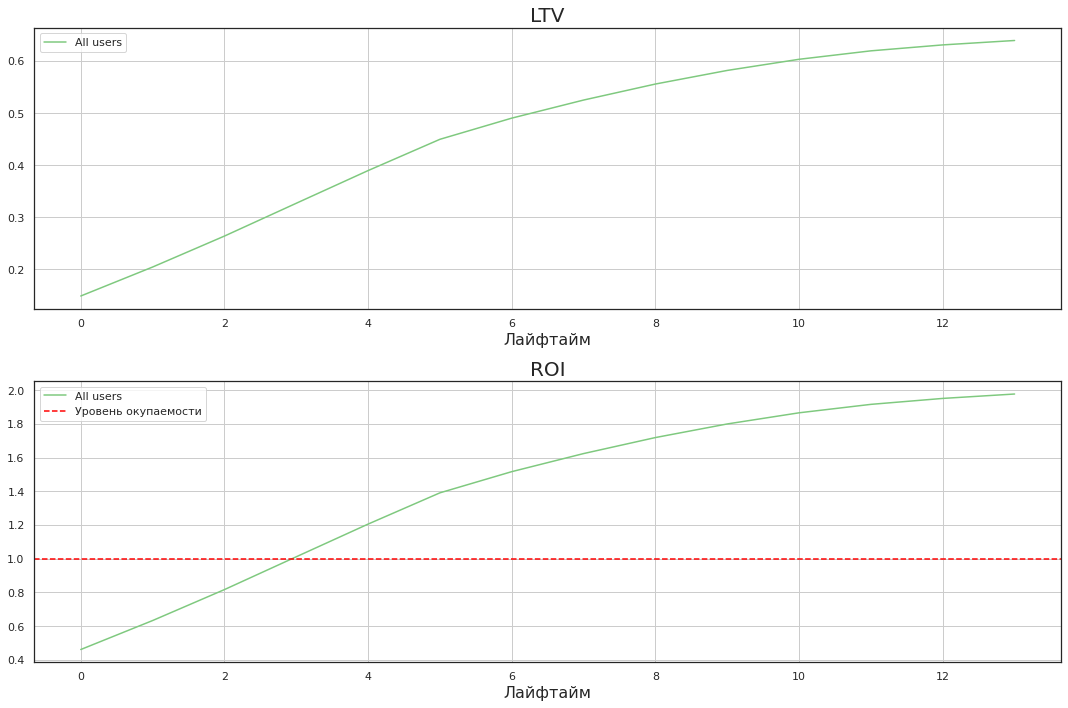

In [41]:
observation_date = datetime(2020, 6, 5).date()  # момент анализа 
horizon_days = 14 # горизонт анализа
# считаем LTV и ROI
ltv_raw, ltv_grouped, roi_grouped = get_ltv(
    profiles, game_actions, observation_date, horizon_days
)

# строим графики

plot_ltv_roi(ltv_grouped, roi_grouped, horizon_days)

По графикам видно, что реклама себя окупает. LTV стабильно растет. ROI к 4 дню стабильно выше 100%.

Посмотрим на эти же метрики по рекламным источник отдельно.

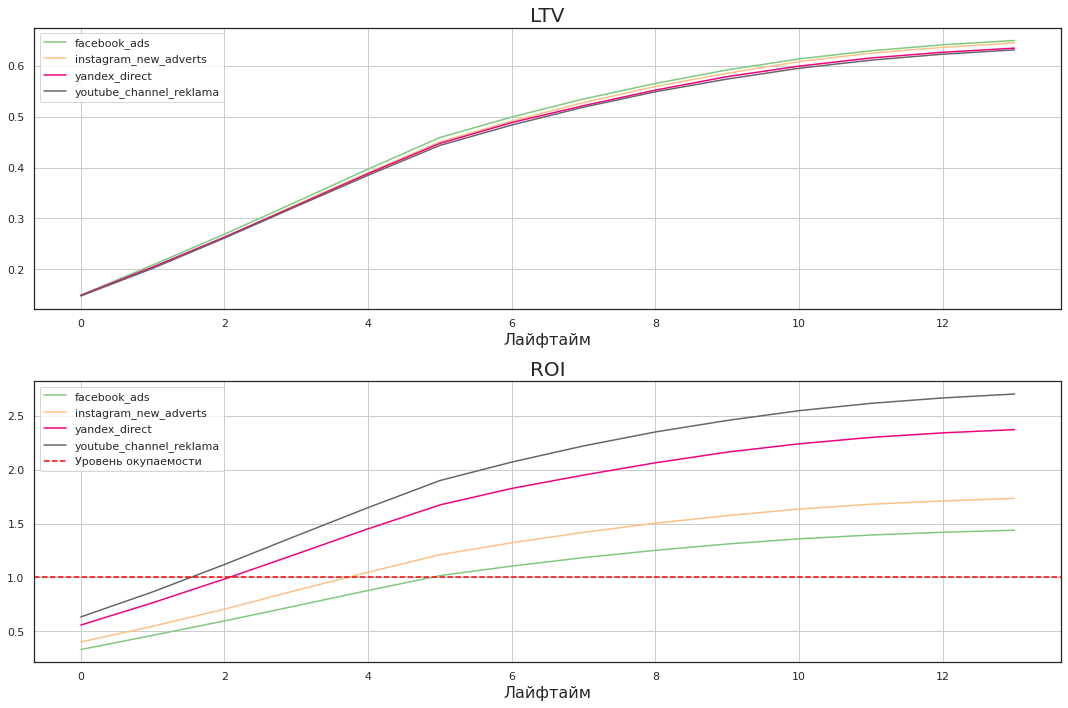

In [42]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, roi_grouped = get_ltv(
    profiles, game_actions, observation_date, horizon_days, dimensions=['source']
)

# строим графики

plot_ltv_roi(ltv_grouped, roi_grouped, horizon_days)

 LTV для всех рекламных источников практически одинаково растет.  ROI ко 2 дню начинает окупаться у youtube_channel_reklama и yandex_direct. Позже всех, примерно на 5 день, начинает окупаться у facebook_ads.

#### Вывод

По дням в игру в среднем заходят 2885 пользовтаелей, в неделю - 6120. Sticky Factor равен 47.14%, что достаточно высоко.

У facebook 10.05.2020 стоимость привлечения упала. Cамыйм дорогим каналом по привлечению является facebook_ads, самый дешевый youtube_channel_reklama. Cредняя стоимость CAC для всех 4 каналов - 0.57. Больше всего пользователй пришло с yandex_direct, туда же вкладывают чуть больше денег, чем во все остальные, хотя затраты примерно одинаковые. Меньше всего вкладывают в youtube_channel_reklama.

Реклама себя окупает. Пожизненная ценность пользователя стабильно растет во всех источниках. Рентабельность вложений в маркетинг к 4 дню стабильно выше 100%: ко 2 дню начинает окупаться у youtube_channel_reklama и yandex_direct. Позже всех, примерно на 5 день, начинает окупаться у facebook_ads.

### Анализ пользователей в процессе игры

#### Общий анализ пользователей

Посмотрим на динамику пользователей в день. 

In [43]:
# создадим сводную таблицу по пользователям
user_df = game_actions.pivot_table(index='date', values='user_id', aggfunc='nunique')

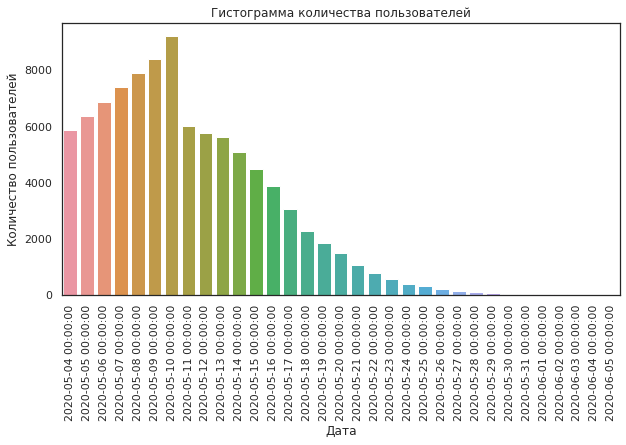

In [44]:
fig = plt.figure(figsize=(10, 5))

user = sns.barplot(x=user_df.index, y='user_id', data=user_df )

plt.title('Гистограмма количества пользователей')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.show()

Большее количество пользователей в игре было с 5 по 10 мая, а дальше, скорее всего, начались учеба, работа и людей становилось меньше. 

Аналогично посмотрим на динамику событий по дням.

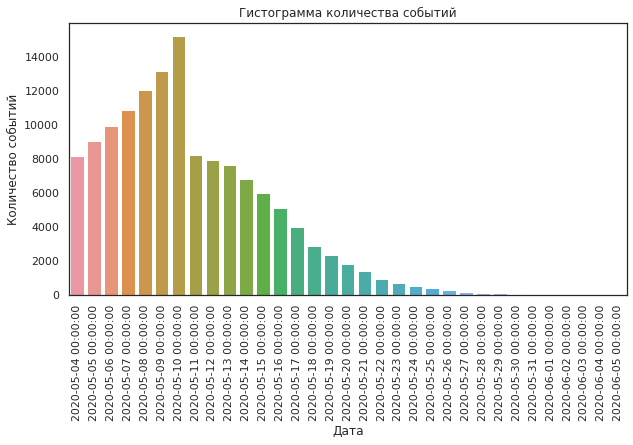

In [45]:
# создадим сводную таблицу 
event_df = game_actions.pivot_table(index='date', values='event', aggfunc='count')

fig = plt.figure(figsize=(10, 5))

event = sns.barplot(x=event_df.index, y='event', data=event_df )

plt.title('Гистограмма количества событий')
plt.ylabel('Количество событий')
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.show()

График практически идентичен по виду графику гистограмме пользователей. Соответственно, до 10 мая количество событий росло, а после 10 стало падать.

Посмотрим, какие события есть в игре и как часто они встречаются. 

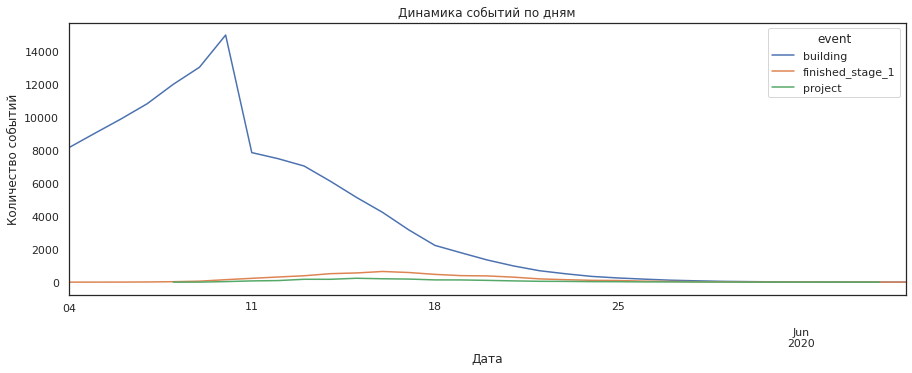

In [46]:
game_actions.pivot_table(index='date', columns ='event', values = 'user_id', aggfunc='count' ).plot(figsize=(15,5))
plt.ylabel('Количество событий'), plt.xlabel('Дата')
plt.title('Динамика событий по дням')
plt.show()

После 10 мая активность постройки падает. Скорее всего к тому времени пользователи либо переходят на следующий уровень, либо им надоедает строить и они уходят. Посмотрим на дальнейшие графики.

Посмотрим, какое соотношение событий в процентах.

In [47]:
events_total = game_actions.groupby('event')['user_id'].count().reset_index()

# создадим колонку с долей каждого события в процентном соотношении
events_total['ratio'] = events_total['user_id']/events_total['user_id'].sum()*100 
events_total.columns = ['event', 'quantity', 'ratio_%']

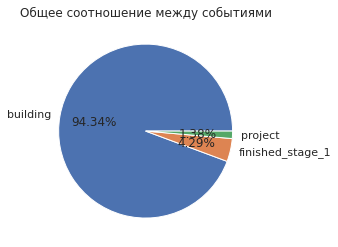

In [48]:
plt.title('Общее соотношение между событиями')
values = events_total['ratio_%']
names = list(events_total['event'])
plt.pie(
    values,
    labels=names,
    autopct='%.2f%%');

Чаще всего пользователи строили здания - 94%, 4% проходили уровень, и 1% завершали проект.

Аналогично рассмотрим соотношение типов построенных зданий в игре.

In [49]:
building_total = game_actions.groupby('building_type')['user_id'].count().reset_index()

# создадим колонку с долей каждого события в процентном соотношении
building_total['ratio'] = building_total['user_id']/building_total['user_id'].sum()*100 
building_total.columns = ['building_type', 'quantity', 'ratio_%']

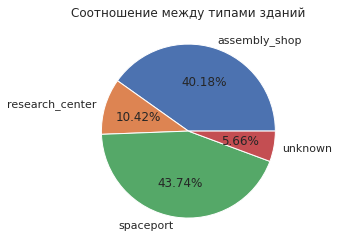

In [50]:
plt.title('Соотношение между типами зданий')
values = building_total['ratio_%']
names = list(building_total['building_type'])
plt.pie(
    values,
    labels=names,
    autopct='%.2f%%');

Чаще всего пользователи выбирали строить космопорт - почти 44%, практически наравне с космопортом строили сборочный цех - 40%, и реже всего строили исследовательский центр - 10%.

Найдем оптимальное количество домов перед показом рекламы. Создадим новую таблицу сгруппированную по пользователям с количеством построенных зданий и суммарным доходом с них.

In [51]:
building = game_actions.groupby('user_id').agg({'building_type':'count','revenue':'sum'}).reset_index()
building.describe()

,building_type,revenue
count,13576.000000,13576.000000
mean,9.991087,0.659761
std,4.146133,0.270256
min,1.000000,0.070000
25%,6.000000,0.420000
50%,10.000000,0.700000
75%,13.000000,0.840000
max,22.000000,1.400000


В среднем пользователи строят по 10 зданий. Создадим функцию для расчета монетизации. 

In [52]:
def monet (df,n,price,count,value): 
    # n -вычитаемое количество реклам,
    # price - прибыль от ролика 0.07
    # count - количество пользователей, завершивших уровень
    # value - расходы на рекламу
    df['build']=df['building_type']-n 
    df['build']= np.maximum(df['building_type'] - n,0)
    df['price']=df['build']*price
    win_cost=price*count # win_cost - доход при показе рекламы к завершению уровня
    return (df['price'].sum()+win_cost)-value

Для функции посчитаем количество пользователей, которые прошли уровень, общие расходы на рекламу. По ТЗ прибыль от рекламного ролика 0.07.

In [53]:
count = len(game_actions.query('event=="finished_stage_1"'))# count - количество пользователей, завершивших уровень
value = ad_costs['cost'].sum() # value - расходы на рекламу

Посмотрим, на каком уровне дохода мы находимся сейчас и далее будем отнимать по 1 рекламному ролику, пока не уйдем в минус.

In [54]:
monet (building,0,0.07,count,value) #сейчас

2298.3430132119793

In [55]:
monet (building,1,0.07,count,value) # -1 ролик

1348.0230132119777

In [56]:
monet (building,2,0.07,count,value) # -2 ролика

401.6930132119778

In [57]:
monet (building,3,0.07,count,value) # -3 ролика

-528.6069867880233

На третьем получаем минус, соответсвенно можем начать показывать рекламу после третьего построенного здания.

Посчитаем количество уникальных пользователей в процентах, прошедших уровень.

In [58]:
#сгруппируем таблицу
level=game_actions.groupby('event').agg({'user_id':'nunique'}).reset_index()
level

,event,user_id
0,building,13576
1,finished_stage_1,5817
2,project,1866


In [59]:
print('Процент, прошедших уровень:',(level.iloc[1,1]/level.iloc[0,1])*100)

Процент, прошедших уровень: 42.847672362993514


Почти 43% от всего количества бользователй прошли уровень. Посмотрим на динамику прошедших и не прошедших отдельно.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Воот, здесь верное количество пользователей по стратегиям игры</div>

#### Анализ прошедших уровень пользователей и не прошедших

Создадим две отдельные таблицы по тем, кто прошел уровень и не прошел.

In [60]:
finish_user= game_actions.query('event == "finished_stage_1" or event == "project" or event == "fight"')['user_id'] #только закончившие пользователи
finish = game_actions.merge(finish_user, how='inner') # таблица прошедших

In [61]:
not_finish = game_actions.set_index('user_id')# перенесем user_id в индекс
not_finish = not_finish.drop(finish_user,axis = 0)#удалим user_id, которые прошли уровень
not_finish['user_id'] = not_finish.index  # возвратим user_id в столбец 
not_finish = not_finish.reset_index(drop=True)
not_finish = not_finish[['event_datetime', 'event', 'building_type', 'user_id','date', 'week', 'source',
       'revenue']] # таблица не прошедших

Построим гистограммы по количеству пользователей в день для двух таблиц. 

In [62]:
# создадим сводные таблицы по пользователям
fin_user = finish.pivot_table(index='date', values='user_id', aggfunc='nunique')
not_fin_user = not_finish.pivot_table(index='date', values='user_id', aggfunc='nunique')

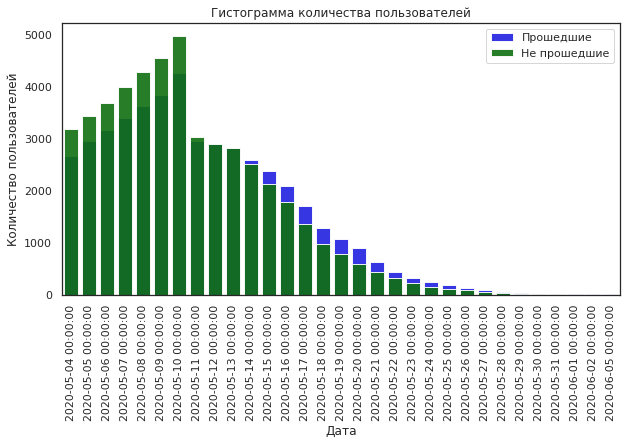

In [63]:
fig = plt.figure(figsize=(10, 5))

fin = sns.barplot(x=fin_user.index, y='user_id', data=fin_user, alpha = 0.9, color = 'blue', label = 'Прошедшие')
not_fin = sns.barplot(x=not_fin_user.index, y='user_id', data=not_fin_user, alpha = 0.9, color = 'green', label = 'Не прошедшие')


plt.title('Гистограмма количества пользователей')
plt.ylabel('Количество пользователей')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.show()

Как видно по графику, до 10 мая не прошедших уровень было больше, чем прошедших. Следующие 3 дня было примерно одинаковое количество прошедших и не прошедших. А затем, когда общее количество пользователей стало убывать, прошедших уровень стало больше, чем не прошедших.

Аналогично посмотрим на гистограмму количества действий в день.

In [64]:
# создадим сводные таблицы по пользователям
fin_event = finish.pivot_table(index='date', values='event', aggfunc='count')
not_fin_event = not_finish.pivot_table(index='date', values='event', aggfunc='count')

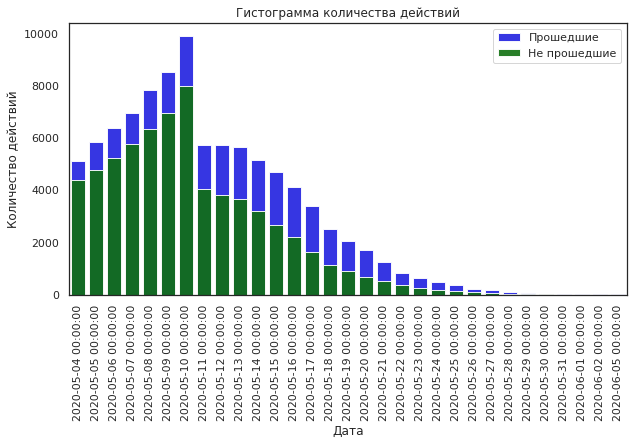

In [65]:
fig = plt.figure(figsize=(10, 5))

fin = sns.barplot(x=fin_event.index, y='event', data=fin_event, alpha = 0.9, color = 'blue', label = 'Прошедшие')
not_fin = sns.barplot(x=not_fin_event.index, y='event', data=not_fin_event, alpha = 0.9, color = 'green', label = 'Не прошедшие')


plt.title('Гистограмма количества действий')
plt.ylabel('Количество действий')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.show()

Хотя до 10 мая пользователей прошедших уровень было меньше, зато действий они совершали больше на протяжении всего времени, чем не прошедшие. 

Все-таки некоторым пользователям надоедает строить здания и они уходят из игры, а те, кто проходят уровень продолжают играть.

Определим откуда чаще приходят пользователи прошедшие и не прошедшие уровень

In [66]:
source_total = finish.groupby('source')['user_id'].count().reset_index()

# создадим колонку с долей каждого источника в процентном соотношении
source_total['ratio'] =source_total['user_id']/source_total['user_id'].sum()*100 
source_total.columns = ['source', 'quantity', 'ratio_%']

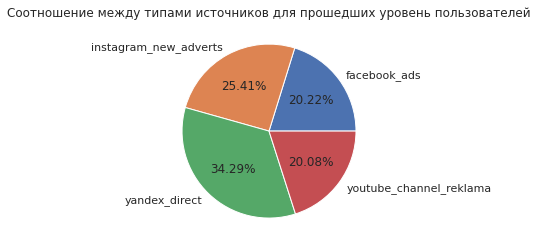

In [67]:
plt.title('Соотношение между типами источников для прошедших уровень пользователей')
values = source_total['ratio_%']
names = list(source_total['source'])
plt.pie(
    values,
    labels=names,
    autopct='%.2f%%');

In [68]:
#Аналогично посмотрим на тех, кто не прошел
source_not_total = not_finish.groupby('source')['user_id'].count().reset_index()

# создадим колонку с долей каждого источника в процентном соотношении
source_not_total['ratio'] =source_not_total['user_id']/source_not_total['user_id'].sum()*100 
source_not_total.columns = ['source', 'quantity', 'ratio_%']

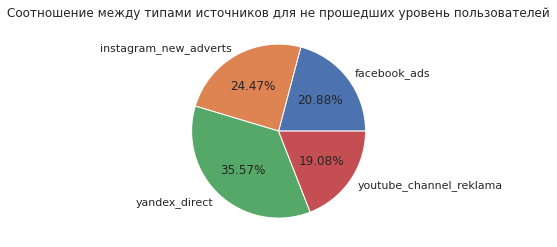

In [69]:
plt.title('Соотношение между типами источников для не прошедших уровень пользователей')
values = source_not_total['ratio_%']
names = list(source_not_total['source'])
plt.pie(
    values,
    labels=names,
    autopct='%.2f%%');

Источник, откуда пришел пользователь не особо влияет на прохождения уровня. В обоих случаях большинство пользователй приходят из yandex_direct, меньше всего из youtube_channel_reklama.

#### Вывод

Большее количество пользователей в игре было с 5 по 10 мая, а дальше, скорее всего, начались учеба, работа и людей становилось меньше. Соответственно, до 10 мая количество событий росло, а после 10 стало падать. 

Чаще всего пользователи строили здания - 94%, 4% проходили уровень, и 1% завершали проект. После 10 мая активность постройки падает. Скорее всего к тому времени пользователи либо переходят на следующий уровень, либо им надоедает строить и они уходят. Чаще всего пользователи выбирали строить космопорт - почти 44%, практически на равне с космопортом строили сборочный цех - 40%, и реже всего строили исследовательский центр - 10%. По модели монетизации можем начать показывать рекламу после третьего построенного здания и не уйти в минус.

Почти 43% от всего количества бользователй прошли уровень. До 10 мая не прошедших уровень было больше, чем прошедших. Следующие 3 дня было примерно одинаковое количество прошедших и не прошедших. А затем, когда общее количество пользователей стало убывать, прошедших уровень стало больше, чем не прошедших. Хотя до 10 мая пользователей прошедших уровень было меньше, зато действий они совершали больше на протяжении всего времени, чем не прошедшие. Все-таки некоторым пользователям надоедает строить здания и они уходят из игры, а те, кто проходят уровень продолжают играть. Источник, откуда пришел пользователь не особо влияет на прохождения уровня. В обоих случаях большинство пользователй приходят из yandex_direct, меньше всего из youtube_channel_reklama.

## Проверка гипотез

### Гипотеза №1 Время завершения уровня различается в зависимости от способа прохождения

Сформулируем гипотезы:

Н0: Время завершения уровня через реализацию проекта и через победу над первым игроком равны.

Н1: Время завершения уровня через реализацию проекта и через победу над первым игроком не равны.

Возьмем уже созданную ранее таблицу с пользователями, которые прошли уровень. Добавим в нее лайфтайм по времени. Необходимо разделить таблицы по уровню - пользователи, которые прошли уровень через реализацию проекта или через победу над врагом.

In [70]:
#добавляем время первого действия
first_date = finish.groupby('user_id').agg({'event_datetime':'min'}).reset_index() #группируем таблицу по user_id и находим минимальную дату
#переименовываем столбцы
first_date.columns = ['user_id', 'first_date']
#объединяем таблицы finish и first_date
finish = finish.merge(first_date, on='user_id', how='left')
#добавляем время прохождения уровня действия
finish_date = finish.query('event == "finished_stage_1" or event == "project" or event == "fight"') # сокращаем таблицу до прохождения уровня
finish_date = finish_date.groupby('user_id').agg({'event_datetime':'min'}).reset_index() #группируем таблицу по user_id и находим первую дату прохождения уровня
#объединяем таблицы finish и finish_date 
finish_date .columns = ['user_id', 'finish_date']
finish = finish.merge(finish_date, on='user_id', how='left')



In [71]:
finish['lifetime'] = (finish['finish_date'] - finish['first_date'])
finish['lifetime'] = finish['lifetime'] / np.timedelta64(1,'h')
finish['lifetime'] = finish['lifetime'].round().astype('int') 

In [72]:
# формируем выборки
project = finish.query('status == "project"')['lifetime'].reset_index()
fighters = finish.query('status == "fight"')['lifetime'].reset_index()

Для каждой выборки создадим столбец с лайфтаймом прохождения уровня.

In [73]:
#посчитаем соотношение дисперсий
var = np.var(project['lifetime']) / np.var(fighters['lifetime'])
print('Соотношение дисперсий:', var)

Соотношение дисперсий: 0.7865378634162058


Гипотезу будем проверять с помощью t-теста, т.к. мы делаем предположение о равенстве средних двух независимых совокупностей. Определим пороговое значение alpha = 0.05 Дисперсии генеральных совокупностей не равны, соответственно, дальше в расчетах применим параметр equal_var=False. 

In [74]:
alpha = .05 # критический уровень статистической значимости


results = st.ttest_ind(
    project['lifetime'], 
    fighters['lifetime'],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 9.848526063695497e-19
Отвергаем нулевую гипотезу


P-value – это вероятность получить значение статистики критерия равное наблюдаемому или более нетипичное по сравнению с наблюдаемым при условии, что нулевая гипотеза верна.

На основе имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы, то есть время завершения уровня через реализацию проекта и через победу над первым игроком не равны.

### Гипотеза №2 Пользователи пришедшие из yandex_direct проходят уровень  одинаково по времени с пользователями из facebook_ads

Ранее на визуализации мы увидели, что из yandex_direct пользователей приходит больше и стоимость у него дешевле, чем у facebook_ads. Есть возможность узнать, стоит ли тратить деньги на дорогой facebook_ads.

Выясним, пользователи пришедшие из yandex_direct проходят уровень  одинаково по времени с пользователями из facebook_ads или нет. 

Сформулируем гипотезы:

Н0: Время завершения уровня из разных источников равны.

Н1: Время завершения уровня из разных источников не равны.

In [75]:
# формируем выборки
facebook = finish.query('source == "facebook_ads"')['lifetime'].reset_index()
yandex = finish.query('source == "yandex_direct"')['lifetime'].reset_index()

In [76]:
#посчитаем соотношение дисперсий
var = np.var(yandex['lifetime']) / np.var(facebook['lifetime'])
print('Соотношение дисперсий:', var)

Соотношение дисперсий: 0.9980760011803093


Гипотезу будем проверять с помощью t-теста, т.к. мы делаем предположение о равенстве средних двух независимых совокупностей. Определим пороговое значение alpha = 0.05 Дисперсии генеральных совокупностей не равны, соответственно, дальше в расчетах применим параметр equal_var=False.

In [77]:
alpha = .05 # критический уровень статистической значимости


results = st.ttest_ind(
    yandex['lifetime'], 
    facebook['lifetime'],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.02232291282402776
Отвергаем нулевую гипотезу


На основе имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы, то есть время завершения уровня из разных источников не равны.

### Вывод

На основе имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть есть основания отвергнуть нулевую гипотезу в пользу альтернативы, то есть время завершения уровня через реализацию проекта и через победу над первым игроком не равны.

На основе имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть есть основания отвергнуть нулевую гипотезу в пользу альтернативы, то есть время завершения уровня через реализацию проекта и через победу над первым игроком не равны.

## Общий вывод и рекомендации

### Вывод

По дням в игру в среднем заходят 2885 пользовтаелей, в неделю - 6120. Sticky Factor равен 47.14%, что достаточно высоко.

У facebook 10.05.2020 стоимость привлечения упала. Cамыйм дорогим каналом по привлечению является facebook_ads, самый дешевый youtube_channel_reklama. Cредняя стоимость CAC для всех 4 каналов - 0.57. Больше всего пользователй пришло с yandex_direct, туда же вкладывают чуть больше денег, чем во все остальные, хотя затраты примерно одинаковые. Меньше всего вкладывают в youtube_channel_reklama.

Реклама себя окупает. Пожизненная ценность пользователя стабильно растет во всех источниках. Рентабельность вложений в маркетинг к 4 дню стабильно выше 100%: ко 2 дню начинает окупаться у youtube_channel_reklama и yandex_direct. Позже всех, примерно на 5 день, начинает окупаться у facebook_ads.

Большее количество пользователей в игре было с 5 по 10 мая, а дальше, скорее всего, начались учеба, работа и людей становилось меньше. Соответственно, до 10 мая количество событий росло, а после 10 стало падать.

Чаще всего пользователи строили здания - 94%, 4% проходили уровень, и 1% завершали проект. После 10 мая активность постройки падает. Скорее всего к тому времени пользователи либо переходят на следующий уровень, либо им надоедает строить и они уходят. Чаще всего пользователи выбирали строить космопорт - почти 44%, практически на равне с космопортом строили сборочный цех - 40%, и реже всего строили исследовательский центр - 10%. Каждый пользователь в среднем строит примерно 10 зданий, а значит смотрит 10 реклам. Доход от одного пользователя получается : 0.07 (стоимость рекламы) * 10 = 0.7, при САС 0.57. 

Почти 43% от всего количества пользователей прошли уровень. До 10 мая не прошедших уровень было больше, чем прошедших. Следующие 3 дня было примерно одинаковое количество прошедших и не прошедших. А затем, когда общее количество пользователей стало убывать, прошедших уровень стало больше, чем не прошедших. Хотя до 10 мая пользователей прошедших уровень было меньше, зато действий они совершали больше на протяжении всего времени, чем не прошедшие. Все-таки некоторым пользователям надоедает строить здания и они уходят из игры, а те, кто проходят уровень продолжают играть. Источник, откуда пришел пользователь не особо влияет на прохождения уровня. В обоих случаях большинство пользователй приходят из yandex_direct, меньше всего из youtube_channel_reklama.

На основе имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть есть основания отвергнуть нулевую гипотезу в пользу альтернативы, то есть время завершения уровня через реализацию проекта и через победу над первым игроком не равны. На основе имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть есть основания отвергнуть нулевую гипотезу в пользу альтернативы, то есть время завершения уровня через реализацию проекта и через победу над первым игроком не равны.

### Рекомендации

Немногие доходят до завершения первого уровня, возможно, дело в праздничных днях и люди играли до 10 мая активно, а после спрос стал падать, а, возможно, пользователям наскучивает строить здания и смотреть на рекламу. Если все-таки пользователь теряет интерес из-за построек, значит стоит разнообразить первый уровень или пускать меньше рекламы. 

Чаще всего люди приходят из yandex_direct, возможно, следует увеличить финансы именно в этот ресурс и меньше тратить денег на дорогой facebook_ads. 

По модели монетизации можем начать показывать рекламу после двух построенных зданий, то есть на третьем здании, и не уйти в минус.